In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings( 'ignore')

In [6]:
df=pd.read_csv("/content/drive/MyDrive/ELECTRIC_MOTOR/measures_v2.csv")

In [7]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


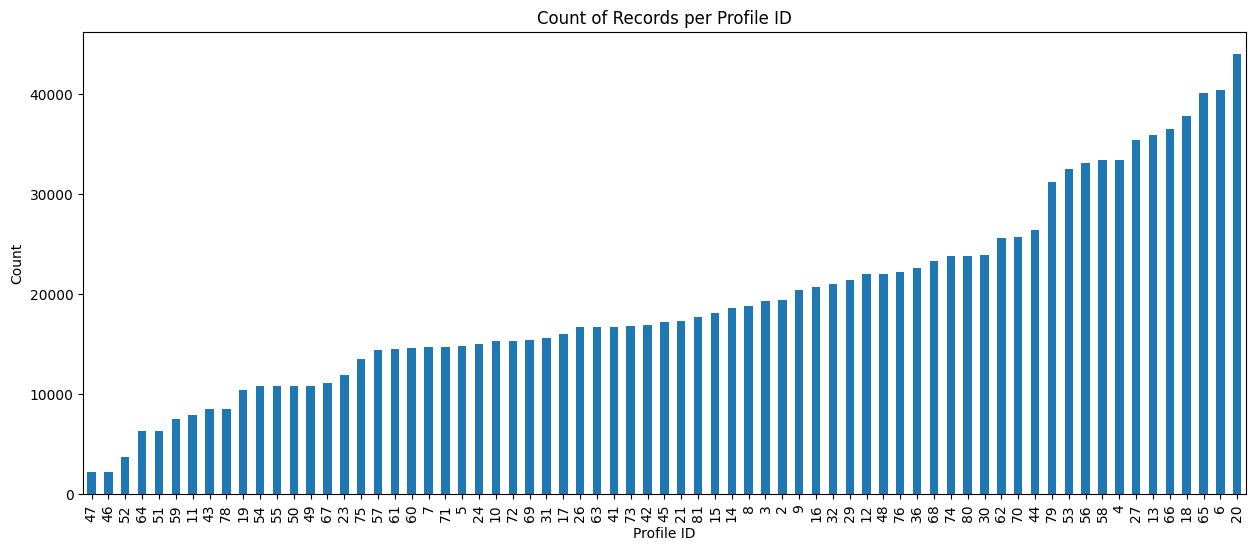

In [8]:
plt.figure(figsize=(15, 6))
df['profile_id'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Profile ID')
plt.ylabel('Count')
plt.title('Count of Records per Profile ID')
plt.show()


In [10]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

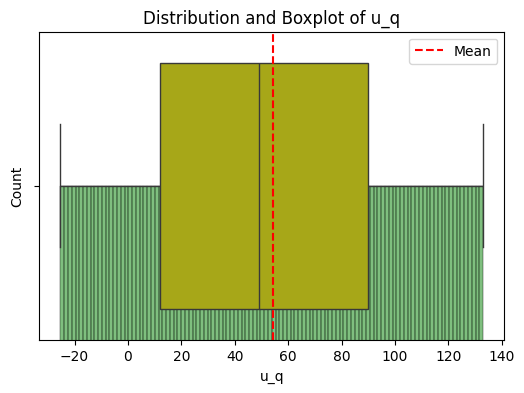

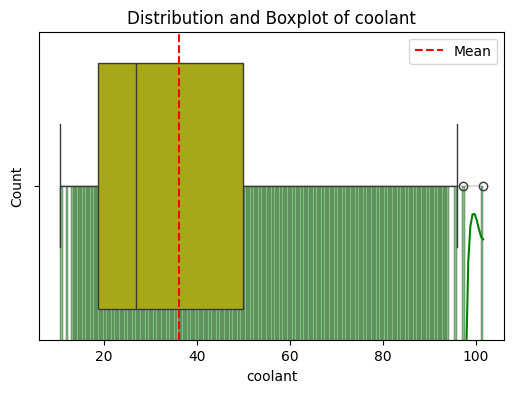

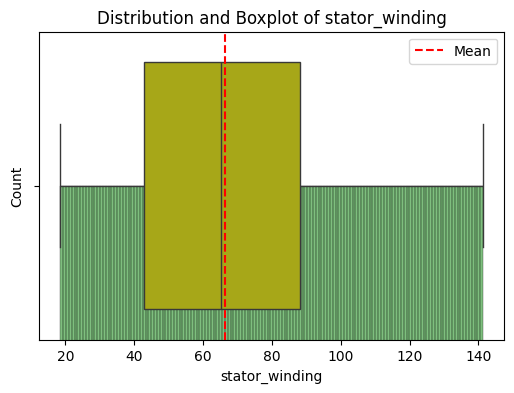

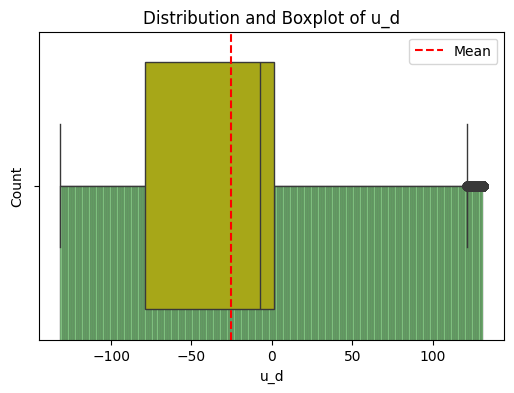

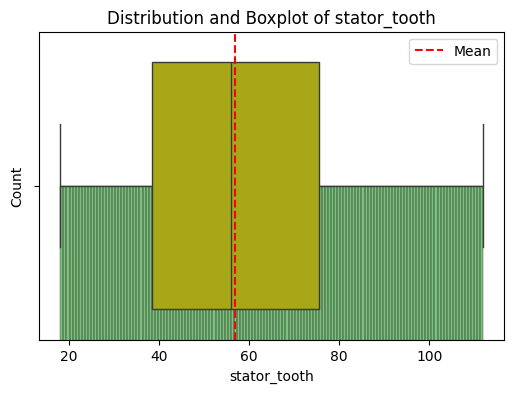

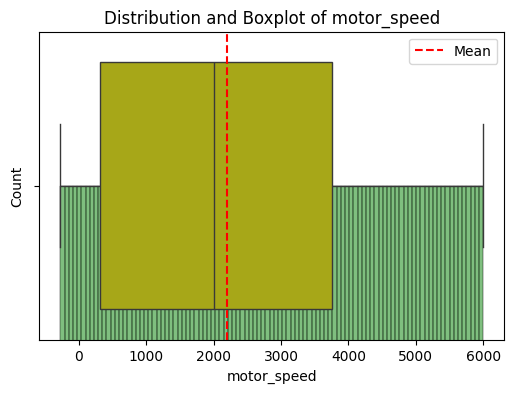

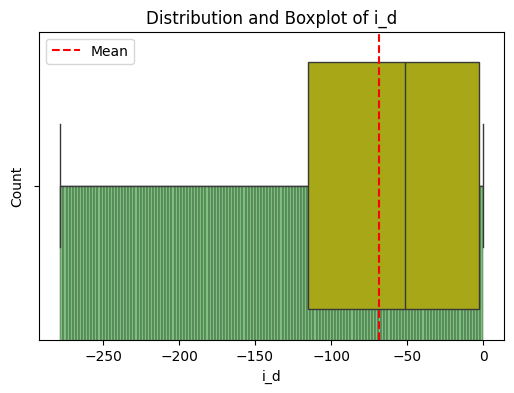

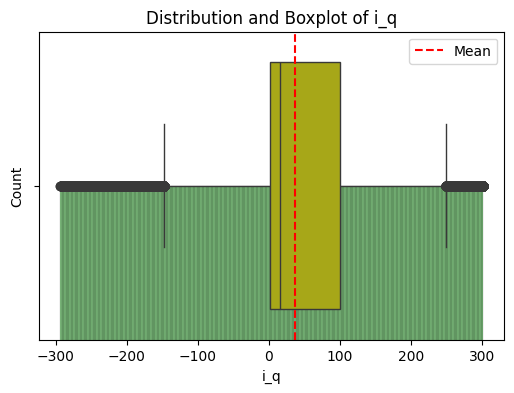

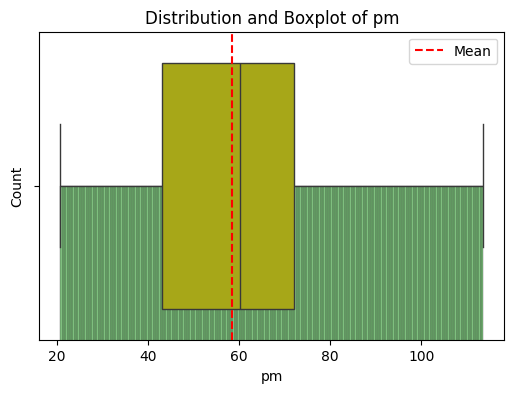

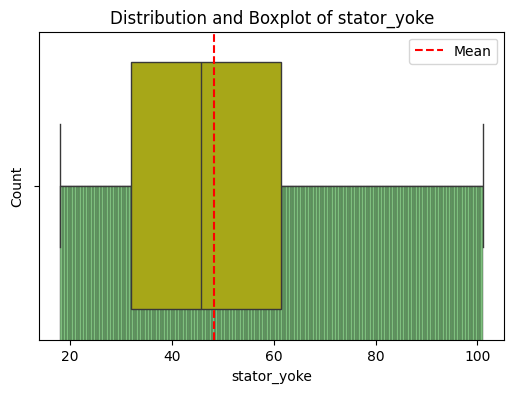

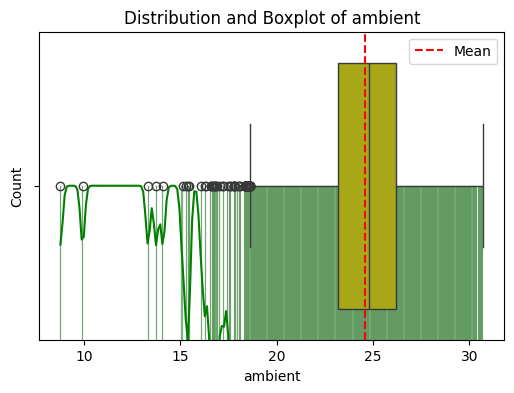

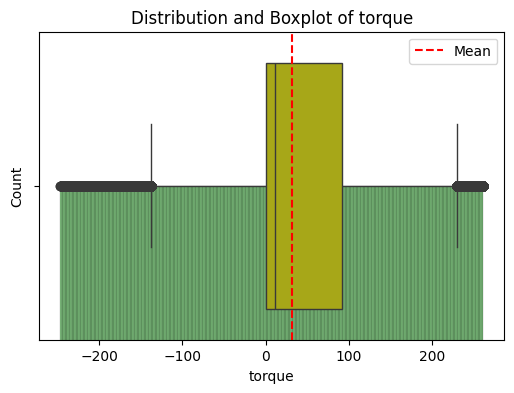

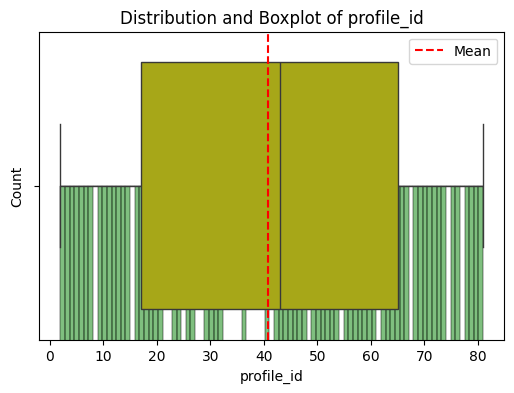

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    plt.figure(figsize=(6, 4))

    # Distribution plot
    sns.histplot(df[col], kde=True, color='g')

    # Boxplot
    sns.boxplot(x=df[col], color='y')

    # Mean line
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')

    plt.title(f'Distribution and Boxplot of {col}')
    plt.legend()
    plt.show()


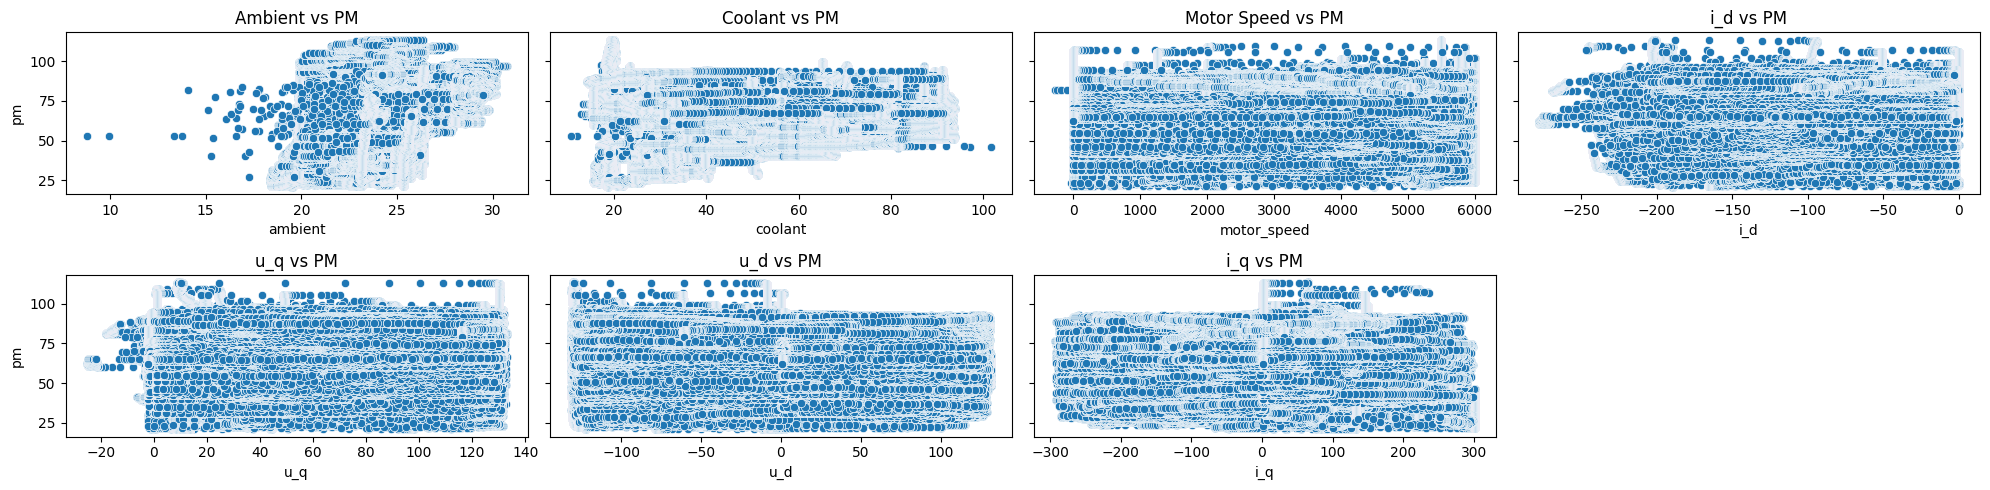

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 5), sharey=True)

# Row 1
sns.scatterplot(x=df['ambient'], y=df['pm'], ax=axes[0][0])
axes[0][0].set_title('Ambient vs PM')

sns.scatterplot(x=df['coolant'], y=df['pm'], ax=axes[0][1])
axes[0][1].set_title('Coolant vs PM')

sns.scatterplot(x=df['motor_speed'], y=df['pm'], ax=axes[0][2])
axes[0][2].set_title('Motor Speed vs PM')

sns.scatterplot(x=df['i_d'], y=df['pm'], ax=axes[0][3])
axes[0][3].set_title('i_d vs PM')

# Row 2
sns.scatterplot(x=df['u_q'], y=df['pm'], ax=axes[1][0])
axes[1][0].set_title('u_q vs PM')

sns.scatterplot(x=df['u_d'], y=df['pm'], ax=axes[1][1])
axes[1][1].set_title('u_d vs PM')

sns.scatterplot(x=df['i_q'], y=df['pm'], ax=axes[1][2])
axes[1][2].set_title('i_q vs PM')

# Hide empty subplot (last one)
axes[1][3].axis('off')

plt.tight_layout()
plt.show()


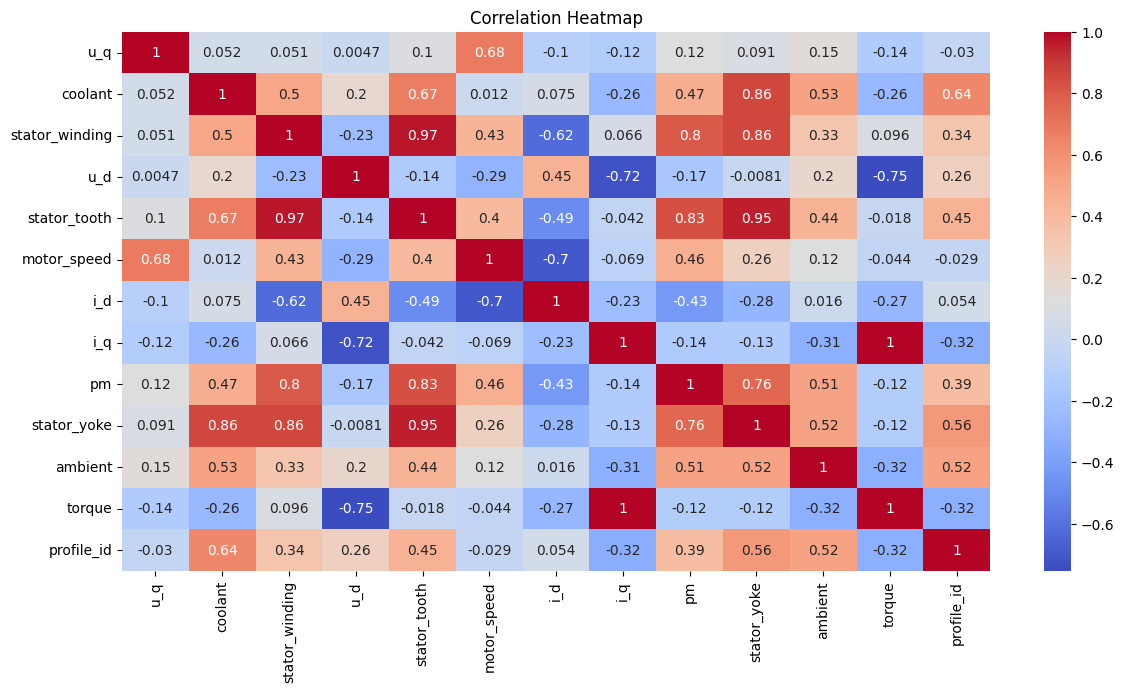

In [14]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


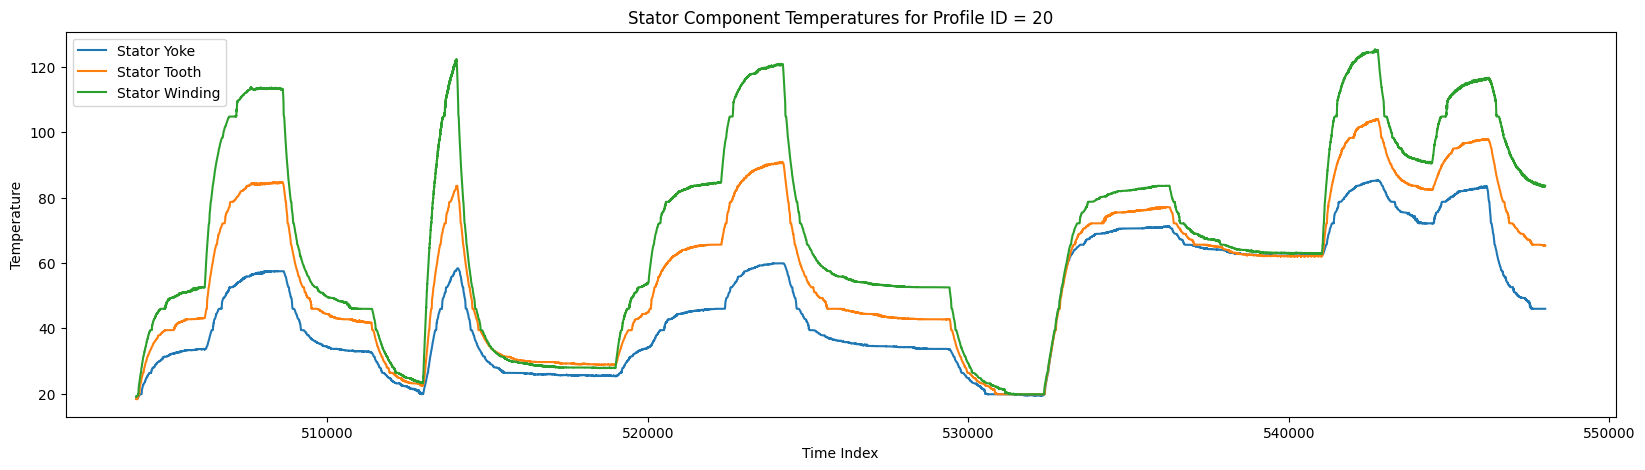

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

df[df['profile_id'] == 20]['stator_yoke'].plot(label='Stator Yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label='Stator Tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label='Stator Winding')

plt.xlabel("Time Index")
plt.ylabel("Temperature")
plt.title("Stator Component Temperatures for Profile ID = 20")
plt.legend()
plt.show()


In [18]:
df.drop('profile_id', axis=1, inplace=True, errors='ignore')


In [19]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
dtypes: float64(12)
memory usage: 121.8 MB


In [22]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02


In [28]:
df1=df.drop(['stator_yoke','stator_tooth','stator_winding','torque'],axis=1)

In [29]:
df1.head()

,u_q,coolant,u_d,motor_speed,i_d,i_q,pm,ambient
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,24.554214,19.850691
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,24.538078,19.850672
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,24.544693,19.850657
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,24.554018,19.850647
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,24.565397,19.850639


In [30]:
df1.isnull().sum()

,0
u_q,0
coolant,0
u_d,0
motor_speed,0
i_d,0
i_q,0
pm,0
ambient,0


In [34]:
# =========================
# STEP 1: Imports
# =========================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import joblib

# =========================
# STEP 2: Feature & Target Selection
# =========================
features_to_scale = ['ambient', 'coolant', 'u_d', 'i_d', 'i_q']
target_column = 'pm'

# Input features and target
X_data = df1[features_to_scale]
y_data = df1[target_column]

# =========================
# STEP 3: Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_data,
    test_size=0.2,
    random_state=42
)

# =========================
# STEP 4: MinMax Scaling
# =========================
mm = MinMaxScaler()

# Fit ONLY on training data
X_train_scaled = mm.fit_transform(X_train)

# Transform test data using SAME scaler
X_test_scaled = mm.transform(X_test)

# Convert back to DataFrame
X = pd.DataFrame(X_train_scaled, columns=features_to_scale)
X_df1_test = pd.DataFrame(X_test_scaled, columns=features_to_scale)

# =========================
# STEP 5: Target Variables
# =========================
y = y_train.reset_index(drop=True)
y_df1_test = y_test.reset_index(drop=True)

# =========================
# STEP 6: Save Scaler
# =========================
joblib.dump(mm, 'transform.save')

print("✅ Train-test split completed")
print("✅ Features scaled using MinMaxScaler")
print("✅ Scaler saved as transform.save")


✅ Train-test split completed
✅ Features scaled using MinMaxScaler
✅ Scaler saved as transform.save


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import numpy as np


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,        # reduced
    max_depth=15,            # reduced
    min_samples_split=10,    # increased
    min_samples_leaf=4,      # increased
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X, y)


RandomForestRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                      n_jobs=-1, random_state=42)

In [39]:
y_pred = rf_model.predict(X_df1_test)

mae = mean_absolute_error(y_df1_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_df1_test, y_pred))
r2 = r2_score(y_df1_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 2.003360502530888
RMSE: 3.5835339248473734
R²  : 0.9644516828541994


In [40]:
accuracy = r2 * 100
print(f"Model Accuracy (R²): {accuracy:.2f}%")


Model Accuracy (R²): 96.45%


In [41]:
joblib.dump(rf_model, "model.save")


['model.save']

In [42]:
from google.colab import files

files.download("model.save")
files.download("transform.save")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>